# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
!pip install -r requirements.txt

  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested numpy==1.22.4
    pandas 1.5.3 depends on numpy>=1.21.0; python_version >= "3.10"
    pandas 1.5.3 depends on numpy>=1.23.2; python_version >= "3.11"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install numpy==1.22.4 and pandas==1.5.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

# 한글 설정
plt.rc('font', family='Malgun Gothic')

# 모든 행과 열을 보여주기 위한 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [2]:
file1 = 'open_data.csv'
file2 = 'weather.csv'

In [3]:
# read_csv를 활용
call_taxi = pd.read_csv(file1)
weather = pd.read_csv(file2)

In [4]:
call_taxi.head(1)

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764


In [5]:
weather.head(1)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.9


In [7]:
# to_datetime 활용, '기준일' 컬럼 타입 변경  
call_taxi['기준일'] = pd.to_datetime(call_taxi['기준일'])
print(call_taxi['기준일'].dtype)

datetime64[ns]


In [8]:
# to_datetime 활용, 'Date' 컬럼 타입 변경  
weather['Date'] = pd.to_datetime(weather['Date'])
print(weather['Date'].dtype)

datetime64[ns]


#### 2) 기본 정보 조회

In [12]:
#전체 데이터의 행,열 개수 확인
call_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     2922 non-null   datetime64[ns]
 1   차량운행    2922 non-null   int64         
 2   접수건     2922 non-null   int64         
 3   탑승건     2922 non-null   int64         
 4   평균대기시간  2922 non-null   float64       
 5   평균요금    2922 non-null   int64         
 6   평균승차거리  2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 159.9 KB


* 결측치가 없다.

In [13]:
#전체 데이터의 행,열 개수 확인
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4018 non-null   datetime64[ns]
 1   temp_max         4018 non-null   float64       
 2   temp_min         4018 non-null   float64       
 3   rain(mm)         4018 non-null   float64       
 4   humidity_max(%)  4018 non-null   float64       
 5   humidity_min(%)  4018 non-null   float64       
 6   sunshine(MJ/m2)  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 219.9 KB


* 결측치가 없다.

In [14]:
#전체 데이터의 모든 변수 확인
call_taxi.columns

Index(['기준일', '차량운행', '접수건', '탑승건', '평균대기시간', '평균요금', '평균승차거리'], dtype='object')

In [15]:
#전체 데이터의 모든 변수 확인
weather.columns

Index(['Date', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)'],
      dtype='object')

#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.

In [9]:
# 컬럼 명으로 'Date','car_cnt','request_cnt','ride_cnt','waiting_time','fare','distance' 추천
call_taxi.columns = ['Date', 'Car_Cnt', 'Request_Cnt', 'Ride_Cnt', 'Avg_Waiting_Time', 
                    'Avg_Fare', 'Avg_Distance']


In [10]:
call_taxi.columns

Index(['Date', 'Car_Cnt', 'Request_Cnt', 'Ride_Cnt', 'Avg_Waiting_Time',
       'Avg_Fare', 'Avg_Distance'],
      dtype='object')

## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [11]:
call_taxi.head(2)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611


In [12]:
# dt.weekday, dt.month, dt.week, dt.year 활용
call_taxi['WeekDay'] = call_taxi['Date'].dt.weekday
call_taxi['Month'] = call_taxi['Date'].dt.month
call_taxi['Year'] = call_taxi['Date'].dt.year

In [13]:
call_taxi.head(2)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,2015


In [14]:
# WeekDay 값이 0 ~ 6
call_taxi['WeekDay'] = call_taxi['WeekDay'].map({
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일',
})

In [15]:
call_taxi['WeekDay'].unique()

array(['목', '금', '토', '일', '월', '화', '수'], dtype=object)

### (2) 요일별 (lineplot 활용)

In [16]:
call_taxi.groupby('WeekDay', as_index=False)['Car_Cnt'].mean()

,WeekDay,Car_Cnt
0,금,485.107656
1,목,494.078947
2,수,484.726619
3,월,485.014388
4,일,224.767386
5,토,262.177033
6,화,495.076739


* Car_Cnt(차량 운행수)

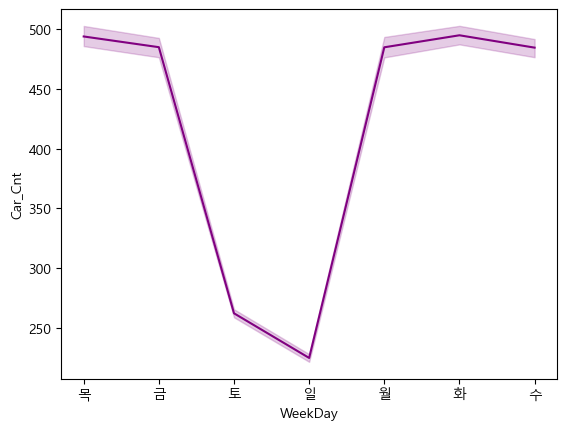

In [24]:
sns.lineplot(x=call_taxi['WeekDay'], y=call_taxi['Car_Cnt'], color='purple')    
plt.show()

* 주말(ex.토, 일)이 평일보다 장애인 콜택시 차량 운행 수가 현저히 적다.
  * 장애인 콜택시 차량에 종사하는 사람들이 주말에 쉬는 것을 알 수 있다.

* Request_Cnt(접수건), Ride_Cnt(탑승건) 

In [25]:
call_taxi.groupby('WeekDay', as_index=False)['Request_Cnt'].mean()

,WeekDay,Request_Cnt
0,금,4692.066986
1,목,4760.677033
2,수,4739.333333
3,월,4715.040767
4,일,1702.781775
5,토,2069.081340
6,화,4800.884892


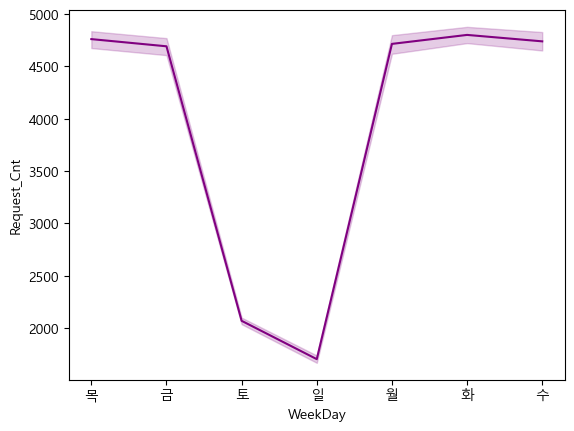

In [26]:
sns.lineplot(x=call_taxi['WeekDay'], y=call_taxi['Request_Cnt'], color='purple')    
plt.show()

* 주말이 평일에 비해 장애인 콜택시 호출 건수가 현저히 낮다.
  * 장애인들은 평일에 일하고 주말에는 쉬기 떄문에 관련이 있는 것 같다.

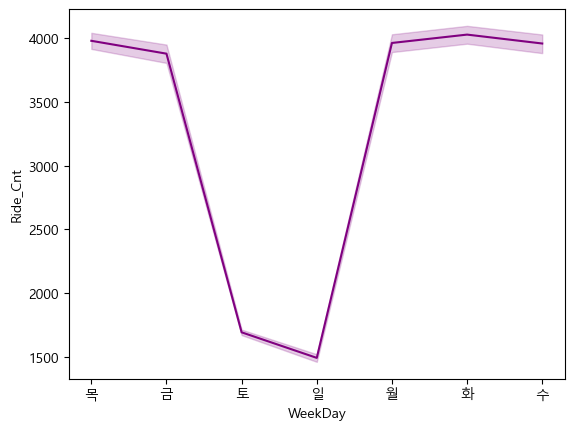

In [27]:
sns.lineplot(x=call_taxi['WeekDay'], y=call_taxi['Ride_Cnt'], color='purple')    
plt.show()

* 앞서 했던 것과 비슷한 맥락인 것 같다.

* Avg_Waiting_Time(평균 대기시간)

In [28]:
call_taxi.groupby('WeekDay', as_index=False)['Avg_Waiting_Time'].mean()

,WeekDay,Avg_Waiting_Time
0,금,40.956459
1,목,41.043780
2,수,41.676259
3,월,39.243165
4,일,34.902878
5,토,43.480144
6,화,40.826139


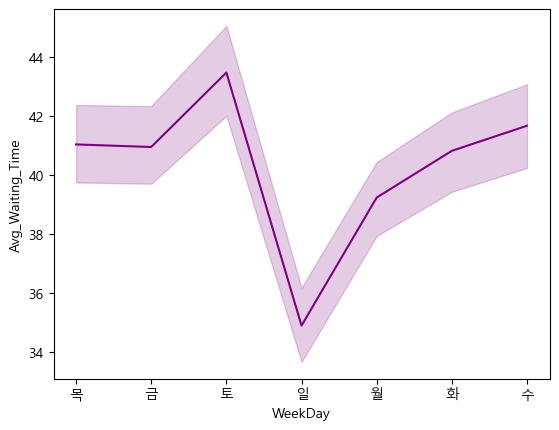

In [29]:
sns.lineplot(x=call_taxi['WeekDay'], y=call_taxi['Avg_Waiting_Time'], color='purple')    
plt.show()

* Avg_Fare(평균 비용)

* Avg_Distance(평균 이동거리)

### (3) 요일별 (boxplot활용)

* Car_Cnt(차량 운행수)

* Request_Cnt(접수건), Ride_Cnt(탑승건) 

* Avg_Waiting_Time(평균 대기시간)

* Avg_Fare(평균 비용)

* Avg_Distance(평균 이동거리)

### (4) 월별 (boxplot활용)

* Car_Cnt(차량 운행수)

* Request_Cnt(접수건), Ride_Cnt(탑승건) 

*  Avg_Waiting_Time(평균 대기시간)

* Avg_Fare(평균 비용)

* Avg_Distance(평균 이동거리)

### (5) 연도별 (boxplot 활용)

* Car_Cnt(차량 운행수)

*  Request_Cnt(접수건), Ride_Cnt(탑승건) 

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

In [18]:
# 날씨 데이터를 다음 날에 대한 예보 데이터로 간주한다.
# ex) 2020년 12월 23일이면 2020년 12월 24일 예보 데이터로 간주한다.
weather.head(5)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
4,2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


In [19]:
# 날씨 데이터를 다음 날에 대한 예보 데이터로 간주한다.
# ex) 2020년 12월 23일이면 2020년 12월 24일 예보 데이터로 간주한다.
for column in list(weather.columns[1::1]):
    weather[column] = weather[column].shift(-1)

In [20]:
# 2022년 12월 31일에 대한 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)','sunshine(MJ/m2)' 결측치 처리
weather.loc[weather['Date'] == '2022-12-31', ['temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)']] = [-4.4, -4.4, 0.0, 66.0, 66.0, 0.00]

In [22]:
weather.head(5)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,-1.2,-8.3,0.0,80.0,48.0,6.16
1,2012-01-02,-0.4,-6.6,0.4,86.0,45.0,4.46
2,2012-01-03,-4.6,-9.5,0.0,66.0,38.0,8.05
3,2012-01-04,-1.4,-9.6,0.0,71.0,28.0,9.14
4,2012-01-05,1.3,-4.8,0.0,55.0,27.0,8.57


In [21]:
weather.tail(1)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4017,2022-12-31,-4.4,-4.4,0.0,66.0,66.0,0.0


### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [34]:
# 다음날 평균 대기시간을 target으로 잡는다.
# ex) 2015년 1월 1일이면 다음 날인 1월 2일의 평균 대기시간을 가져와서 y(target)으로 삼는다.
call_taxi.head()

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,금,1,2015
2,2015-01-03,209,1648,1514,26.2,2377,10198,토,1,2015
3,2015-01-04,196,1646,1526,24.5,2431,10955,일,1,2015
4,2015-01-05,421,4250,3730,26.2,2214,8663,월,1,2015


In [23]:
call_taxi['Next_AVG_Waiting_Time'] = call_taxi['Avg_Waiting_Time'].shift(-1)

In [24]:
# 2022년 12월 31일에 대한 'Next_AVG_Waiting_Time'에 대한 결측치를 처리한다.
call_taxi.loc[call_taxi['Date'] == '2022-12-31', ['Next_AVG_Waiting_Time']] = 33.7

In [25]:
call_taxi.head()

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2
1,2015-01-02,420,3158,2839,17.2,2216,8611,금,1,2015,26.2
2,2015-01-03,209,1648,1514,26.2,2377,10198,토,1,2015,24.5
3,2015-01-04,196,1646,1526,24.5,2431,10955,일,1,2015,26.2
4,2015-01-05,421,4250,3730,26.2,2214,8663,월,1,2015,23.6


In [26]:
call_taxi.tail()

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time
2917,2022-12-27,669,5635,4654,44.4,2198,8178,화,12,2022,44.8
2918,2022-12-28,607,5654,4648,44.8,2161,7882,수,12,2022,52.5
2919,2022-12-29,581,5250,4247,52.5,2229,8433,목,12,2022,38.3
2920,2022-12-30,600,5293,4200,38.3,2183,8155,금,12,2022,33.7
2921,2022-12-31,263,2167,1806,33.7,2318,9435,토,12,2022,33.7


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [27]:
df = pd.merge(call_taxi, weather, how='inner', on='Date')

In [29]:
df.head()

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,17.2,2216,8611,금,1,2015,26.2,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,26.2,2377,10198,토,1,2015,24.5,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,24.5,2431,10955,일,1,2015,26.2,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,26.2,2214,8663,월,1,2015,23.6,4.1,-7.4,3.4,98.0,29.0,10.47


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 강수량 정도, 일사량 정도, 계절, 탑승률, 일, 달, 연, 쉬는날인지 아닌지 여부

In [30]:
# 'Rain_Value'(강수량 정도)에 대한 변수 추가

# 없는 강수량 : 0.0이면 '비가 오지않음'으로 분류
# 적은 강수량: 보통 5mm 미만의 강수량을 '적은 강수량'으로 분류합니다.
# 중간의 강수량: 5mm 이상 20mm 미만의 강수량을 '중간의 강수량'으로 분류합니다.
# 많은 강수량: 20mm 이상의 강수량
def rain_function(rain):
    if 0.1 <= rain < 5.0:
        return '적은 강수량'
    elif 5.0 <= rain < 20.0:
        return '중간 강수량'
    elif rain >= 20.0:
        return '많은 강수량'
    else:
        return '비가 오지않음'
df['Rain_Value'] = df['rain(mm)'].apply(rain_function)

In [42]:
# 'Sunshine_Value'(일사량 정도)에 대한 변수 추가

# 낮은 일사량: 0 ~ 10 MJ/m^2
# 보통의 일사량: 10 ~ 20 MJ/m^2
# 높은 일사량: 20 MJ/m^2 이상
def sunshine_function(sunshine):
    if 0.0 <= sunshine < 10.0:
        return '낮은 일사량'
    elif 10.0 <= sunshine < 20.0:
        return '보통 일사량'
    elif sunshine >= 20.0:
        return '높은 일사량'
df['Sunshine_Value'] = df['sunshine(MJ/m2)'].apply(sunshine_function)

In [43]:
# 'Season'(계절) 변수 추가

# 봄 (Spring): 3월, 4월, 5월
# 여름 (Summer): 6월, 7월, 8월
# 가을 (Autumn): 9월, 10월, 11월
# 겨울 (Winter): 12월, 1월, 2월

def season_function(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'
df['Season'] = df['Month'].apply(season_function)

In [44]:
# 'Riding_Rate' (탑승률) 변수 추가
df['Riding_Rate'] = round(df['Ride_Cnt'] / df['Request_Cnt'], 4)

In [45]:
# work_rest('쉬는날인지 아닌지 여부') 변수 추가
# 쉬는 날 : 주말 + 공휴일
# 나머지 일하는 날 

# 일단 주말은 쉬는 날이니 주말은 '쉬는 날'로 대치한다.
def work_rest_function(weekday):
    if weekday in ['토', '일']:
        return '쉬는날'
    else:
        return '일하는 날'
df['work_rest'] = df['WeekDay'].apply(work_rest_function)

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [46]:
!pip install workalendar

In [47]:
df.head(1)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Rain_Value,Sunshine_Value,Season,Riding_Rate,work_rest
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,비가 오지않음,낮은 일사량,겨울,0.9032,일하는 날


* 간단 사용법

In [48]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
result = []
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    for yy in cal.holidays(year):
        result.append(yy[0])

In [49]:
# 공휴일도 쉬는 날 처리하기
df.loc[df['Date'].isin(result), 'work_rest'] = '쉬는날'

In [50]:
df.head(1)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Rain_Value,Sunshine_Value,Season,Riding_Rate,work_rest
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,비가 오지않음,낮은 일사량,겨울,0.9032,쉬는날


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [51]:
df['7day_Avg_Waiting_Time'] = df['Avg_Waiting_Time'].rolling(window=7, min_periods=1).mean().round(1)

In [52]:
df.head(1)

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Rain_Value,Sunshine_Value,Season,Riding_Rate,work_rest,7day_Avg_Waiting_Time
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,비가 오지않음,낮은 일사량,겨울,0.9032,쉬는날,23.2


#### 4) 탑승률

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [53]:
from joblib import dump
dump(df, 'data1.pkl')

['data1.pkl']